In [1]:
from cegpy import EventTree
import pandas as pd

In [ ]:
conda install graphviz

In [1]:
conda install python-graphviz

^C

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load Data

GTD = pd.read_csv('C:/R Portfolio/Global_Terrorism_Prediction/globalterrorismdb_0522dist.csv', 
                     encoding = 'latin1',
                     low_memory = False)
GTD_1 = pd.read_csv('C:/R Portfolio/Global_Terrorism_Prediction/globalterrorismdb_2021Jan-June_1222dist.csv', 
                     encoding = 'latin1',
                     low_memory = False)
GTD_combined = pd.concat([GTD, GTD_1], ignore_index = True)
GTD_combined

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,202106300023,2021,6,30,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Gunmen blow up power pylon in Parwan,"" Afghan...","""Provinces hit by blackout after power pylon d...",NaN,START Primary Collection,-9,-9,0,-9,NaN
214662,202106300029,2021,6,30,06/30/2021,0,NaN,138,Myanmar,5,...,NaN,"""Spring Revolution Daily News for 16-30 June 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
214663,202106300030,2021,6,30,NaN,1,08/07/2021,147,Nigeria,11,...,NaN,"""Boko Haram Releases Abducted Catholic Priest ...","""Kidnapped Maiduguri Catholic Priest regains f...","""ISWAP-Boko Haram Abduct Catholic Priest In Bo...",START Primary Collection,0,0,0,0,NaN
214664,202106300038,2021,6,30,NaN,0,NaN,45,Colombia,3,...,NaN,"""Two dead and one wounded after clashes betwee...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


In [3]:
# Load Functions

execfile('C:/Python_Data_Sets/Functions 10_07_2023.py')

In [4]:
# Process Data

GTD_New = preprocess_data(GTD_combined)
GTD_New

,Year,Month,Day,Country,Region,Province,City,Longitude,Latitude,Attack,Target,Group,Weapon,Dead,Lethal
0,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,-69.951164,18.456792,Assassination,Private,MANO-D,OtherWeapon,1.0,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,-99.086624,19.371887,HostageKidnapAttack,GovtDip,23rd of September Communist League,OtherWeapon,0.0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,120.599741,15.478598,Assassination,JournalistsMedia,OtherGroup,OtherWeapon,1.0,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,23.762728,37.997490,BombAttack,GovtDip,OtherGroup,Explosives,0.0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,130.396361,33.580412,InfrastructureAttack,GovtDip,OtherGroup,Incendiary,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,2021,6,30,Afghanistan,South Asia,Parwan,Jangal Bagh,69.196838,35.054772,BombAttack,Utilities,OtherGroup,Explosives,0.0,0
214662,2021,6,30,Myanmar,Southeast Asia,Shan,Muse,97.897143,23.986739,HostageKidnapAttack,EduIns,OtherGroup,OtherWeapon,1.0,1
214663,2021,6,30,Nigeria,Sub-Saharan Africa,Borno,Unknown,13.014035,11.572869,HostageKidnapAttack,RelFigIns,Boko Haram,Firearms,0.0,0
214664,2021,6,30,Colombia,South America,Cauca,Unknown,-76.333069,3.104189,BombAttack,UnknownTarget,Revolutionary Armed Forces of Colombia (FARC) ...,Explosives,0.0,0


In [5]:
# Region Data

# EE Region Data
COL_data = GTD_New[GTD_New['Country'] == 'Colombia']
# Replace 0s and 1s with 'NonLethal' and 'Lethal' in the 'Lethal' column
COL_data['Lethal'] = COL_data['Lethal'].map({0: 'NonLethal', 1: 'Lethal'})
COL_data

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_74600\1469097291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COL_data['Lethal'] = COL_data['Lethal'].map({0: 'NonLethal', 1: 'Lethal'})


,Year,Month,Day,Country,Region,Province,City,Longitude,Latitude,Attack,Target,Group,Weapon,Dead,Lethal
405,1970,7,10,Colombia,South America,Caldas,Manizales,-75.505960,5.059097,HostageKidnapAttack,GovtGen,OtherGroup,OtherWeapon,0.0,NonLethal
1391,1972,7,17,Colombia,South America,BogotaProvince,Bogota,-74.093737,4.594635,Assassination,GovtDip,OtherGroup,Firearms,1.0,Lethal
1639,1972,12,0,Colombia,South America,Antioquia,Medellin,-75.564766,6.242026,HostageKidnapAttack,EduIns,ELN,OtherWeapon,0.0,NonLethal
1689,1973,0,0,Colombia,South America,OtherProvince,unknown,NaN,NaN,HostageKidnapAttack,Business,ELN,OtherWeapon,0.0,NonLethal
1696,1973,1,6,Colombia,South America,Cordoba,Ayapel,-75.142561,8.312931,HostageKidnapAttack,Business,Popular Liberation Army (EPL),OtherWeapon,0.0,NonLethal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214536,2021,6,26,Colombia,South America,ValledelCauca,La Maelstrom,-76.638194,3.328801,ArmedAssaultAttack,Police,Revolutionary Armed Forces of Colombia (FARC) ...,Firearms,1.0,Lethal
214548,2021,6,26,Colombia,South America,Norte de Santander,Vijagual,-73.160000,8.751944,BombAttack,UnknownTarget,Revolutionary Armed Forces of Colombia (FARC) ...,Explosives,0.0,NonLethal
214656,2021,6,30,Colombia,South America,Arauca,Fortul,-71.775119,6.786533,ArmedAssaultAttack,Police,ELN,Explosives,0.0,NonLethal
214657,2021,6,30,Colombia,South America,Arauca,Fortul,-71.775833,6.792500,ArmedAssaultAttack,Military,ELN,Explosives,0.0,NonLethal


In [6]:
COL_New = COL_data[['Target', 'Attack', 'Lethal']]
COL_New

,Target,Attack,Lethal
405,GovtGen,HostageKidnapAttack,NonLethal
1391,GovtDip,Assassination,Lethal
1639,EduIns,HostageKidnapAttack,NonLethal
1689,Business,HostageKidnapAttack,NonLethal
1696,Business,HostageKidnapAttack,NonLethal
...,...,...,...
214536,Police,ArmedAssaultAttack,Lethal
214548,UnknownTarget,BombAttack,NonLethal
214656,Police,ArmedAssaultAttack,NonLethal
214657,Military,ArmedAssaultAttack,NonLethal


# Event Trees

An event tree, also known as a fault tree or decision tree, is a graphical representation of a sequence of events or decisions that occur in a particular scenario. It's commonly used in risk assessment, decision analysis, reliability engineering, and project management to model the potential outcomes of different choices and actions.

Here are the key components and concepts associated with an event tree:

Root Node: The root node represents the initial state or starting point of the scenario. It often corresponds to a specific event or decision that triggers the sequence of events depicted in the tree.
Branches and Nodes: From the root node, the event tree branches out into multiple paths, each representing a possible outcome or alternative course of action. Each branch is associated with a node that represents a specific event, decision point, or condition.

Events: Nodes in the event tree represent individual events or states that may occur during the scenario. These events can be either initiating events (e.g., equipment failure, natural disaster, human error) that initiate the scenario or subsequent events that result from earlier events or decisions.

Decisions: In addition to events, nodes in the event tree may also represent decision points where choices need to be made. Decisions branches typically lead to different possible actions or strategies, each with its own set of potential consequences.

Probabilities: Event trees often incorporate probabilities associated with each branch or node to quantify the likelihood of different outcomes. These probabilities can be based on historical data, expert judgment, simulation models, or other sources of information.

Consequences: Each branch or node in the event tree is associated with specific consequences or outcomes that result from the corresponding event or decision. These consequences can include a range of outcomes such as system failure, project delay, financial loss, environmental impact, or safety hazards.

Analysis and Evaluation: Event trees are used to analyze and evaluate the potential risks, impacts, and benefits associated with different courses of action or scenarios. By considering the probabilities and consequences of various events and decisions, stakeholders can make informed decisions and develop risk mitigation strategies.

Overall, event trees provide a structured framework for modeling and analyzing complex scenarios, helping stakeholders understand the sequence of events, identify potential risks and opportunities, and make more informed decisions. They are valuable tools for risk management, decision support, and strategic planning in a wide range of industries and applications.

# Private Target - Attack Type - Lethal Attack Event Tree

In [7]:
import pandas as pd

filtered_df = COL_New[COL_New['Target'] == 'Private']

# Print the filtered DataFrame
print(filtered_df)

         Target                Attack     Lethal
2851    Private    ArmedAssaultAttack  NonLethal
2912    Private    ArmedAssaultAttack     Lethal
2940    Private    ArmedAssaultAttack  NonLethal
3196    Private    ArmedAssaultAttack     Lethal
3516    Private    ArmedAssaultAttack     Lethal
...         ...                   ...        ...
214310  Private  InfrastructureAttack  NonLethal
214439  Private            BombAttack  NonLethal
214444  Private            BombAttack     Lethal
214461  Private            BombAttack  NonLethal
214532  Private    ArmedAssaultAttack     Lethal

[1802 rows x 3 columns]


In [8]:
COL_Two = COL_New.head(1000)

In [9]:
et = EventTree(filtered_df)

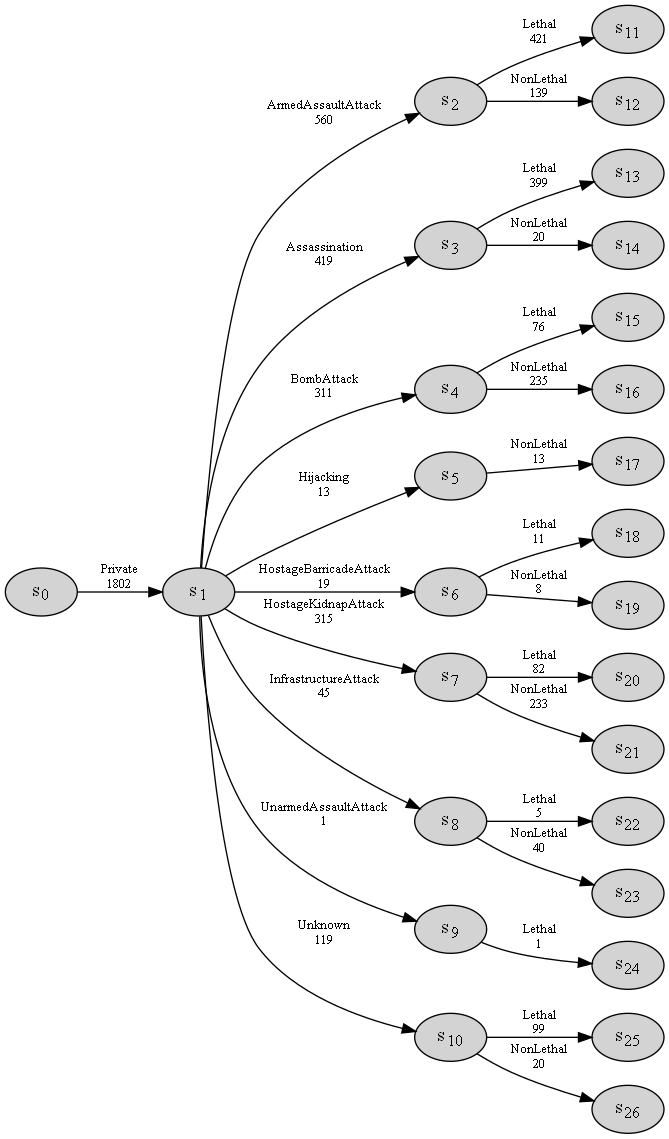

In [10]:
et.create_figure()

The event tree above indicates the distribution of private target variable, attack type variable and lethal attack variable. 
The numbers indicate dispkayed on the below plot indicate the count of each level or label within each variable. So, for instance, there are 1802 instances of Private Target in the data and if we look at the top edge between nodes s1 and s2, we see that there have been 560 armed assault attacks. The final set of numbers on the right hand side are counts of Lethal and Non Lethal attacks.

In [20]:
import graphviz

In [11]:
from cegpy import StagedTree
st = StagedTree(filtered_df)
st

In [25]:
pip install --upgrade cegpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


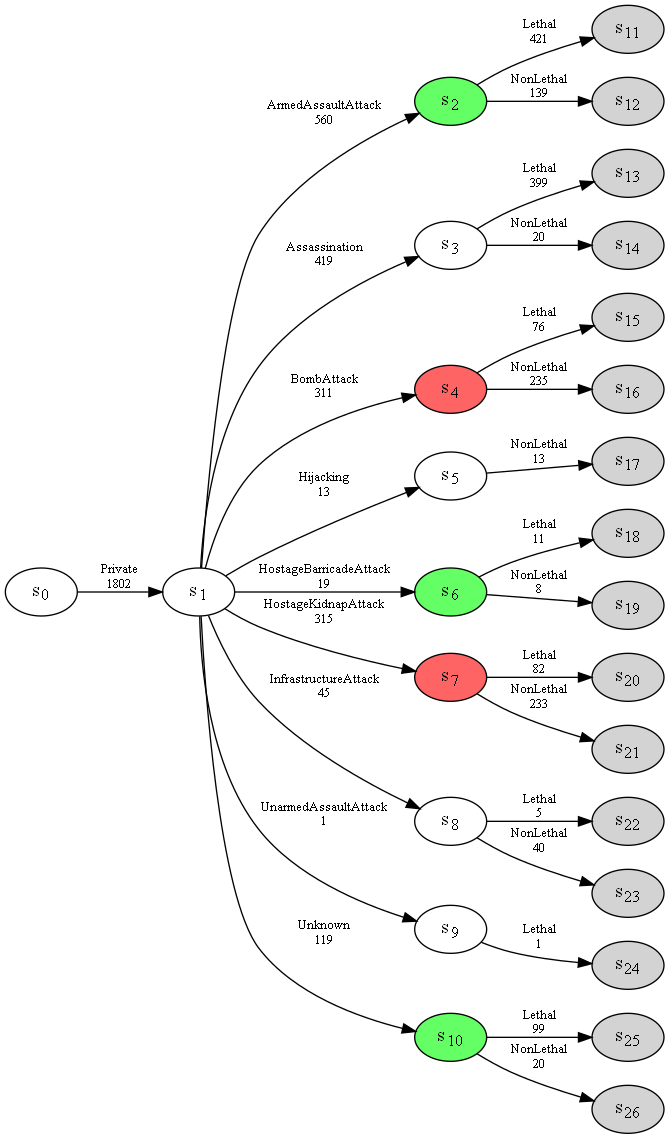

In [12]:
import seaborn as sns

# Generate a list of distinct colors
colours = sns.color_palette("hsv", 9)  # Adjust the number (9) as per your requirement
# colours = ['#BBCC33','#77AADD','#EE8866','#EEDD88','#FFAABB','#44BB99']
st.calculate_AHC_transitions()
st.create_figure()

The above plot is the same as the previous, just this time with some nodes coloured.

# Chain Event Graphs

This section documents and visualises some chain event graphs. 
Event trees directly represent graphically the event space of a system. Chain event graphs reduce their potentially huge dimensionality by taking into account identical probability distributions on some of the event tree’s subtrees, with the
added benefits of showing the conditional independence relationships of the system
The numbers in the plots represent the percentage probabilities of an event happening 

# Private Target - Attack Type - Lethal Attack Chain Event Graph

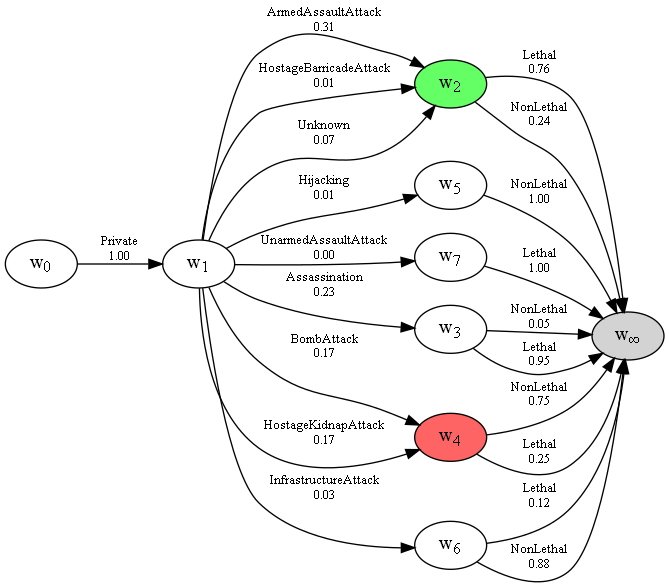

In [13]:
from cegpy import ChainEventGraph
ceg = ChainEventGraph(st)
ceg.create_figure()

In the ceg above, we see that Hostage Kidnap Attacks comprise 17% of the total attacks, and that where a hostage kidnap attack 
has occured, there is a 75% probabiity of the attack being non lethal

# Explosives Weapon - Target - Lethal Attack Chain Event Graph

In [15]:
COL_New = COL_data[['Weapon', 'Target', 'Lethal']]
COL_New

,Weapon,Target,Lethal
405,OtherWeapon,GovtGen,NonLethal
1391,Firearms,GovtDip,Lethal
1639,OtherWeapon,EduIns,NonLethal
1689,OtherWeapon,Business,NonLethal
1696,OtherWeapon,Business,NonLethal
...,...,...,...
214536,Firearms,Police,Lethal
214548,Explosives,UnknownTarget,NonLethal
214656,Explosives,Police,NonLethal
214657,Explosives,Military,NonLethal


In [16]:
import pandas as pd

filtered_df = COL_New[COL_New['Weapon'] == 'Explosives']

# Print the filtered DataFrame
print(filtered_df)

            Weapon            Target     Lethal
1905    Explosives  AirportsAircraft  NonLethal
3278    Explosives  JournalistsMedia  NonLethal
3520    Explosives          Business  NonLethal
3552    Explosives           GovtDip     Lethal
3695    Explosives          Business  NonLethal
...            ...               ...        ...
214461  Explosives           Private  NonLethal
214548  Explosives     UnknownTarget  NonLethal
214656  Explosives            Police  NonLethal
214657  Explosives          Military  NonLethal
214664  Explosives     UnknownTarget  NonLethal

[3504 rows x 3 columns]


In [17]:
from cegpy import StagedTree
st = StagedTree(filtered_df)
st

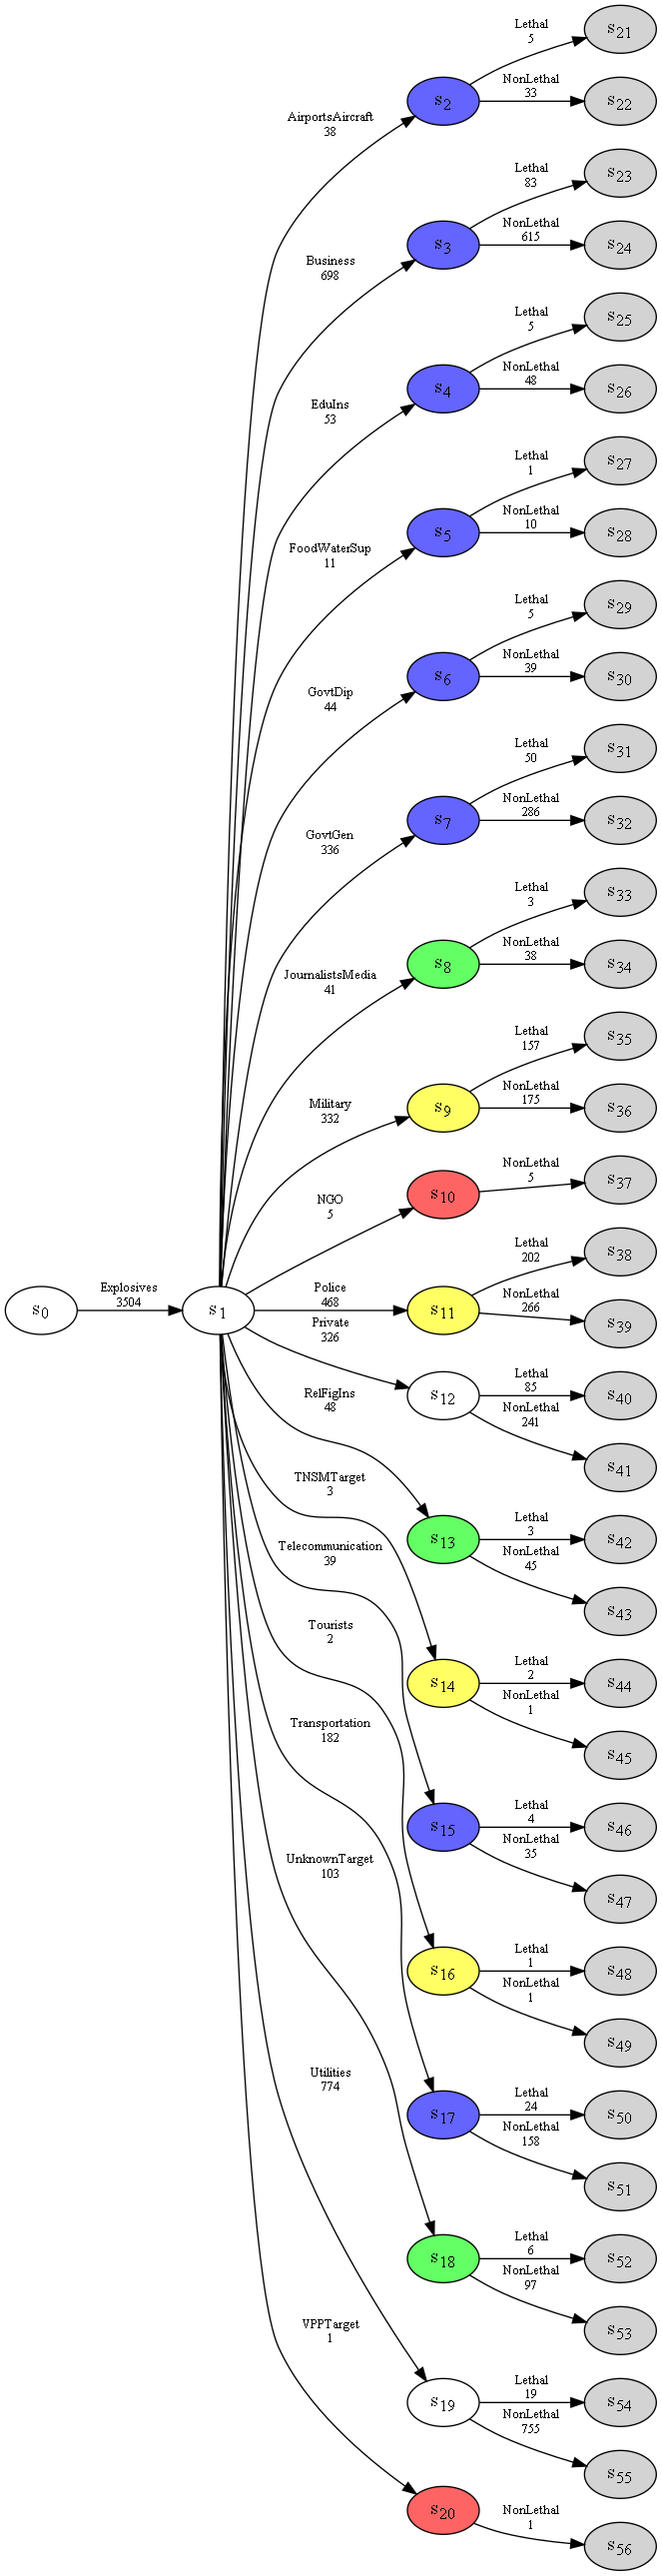

In [19]:
import seaborn as sns

# Generate a list of distinct colors
colours = sns.color_palette("hsv", 9)  # Adjust the number (9) as per your requirement
# colours = ['#BBCC33','#77AADD','#EE8866','#EEDD88','#FFAABB','#44BB99']
st.calculate_AHC_transitions()
st.create_figure()

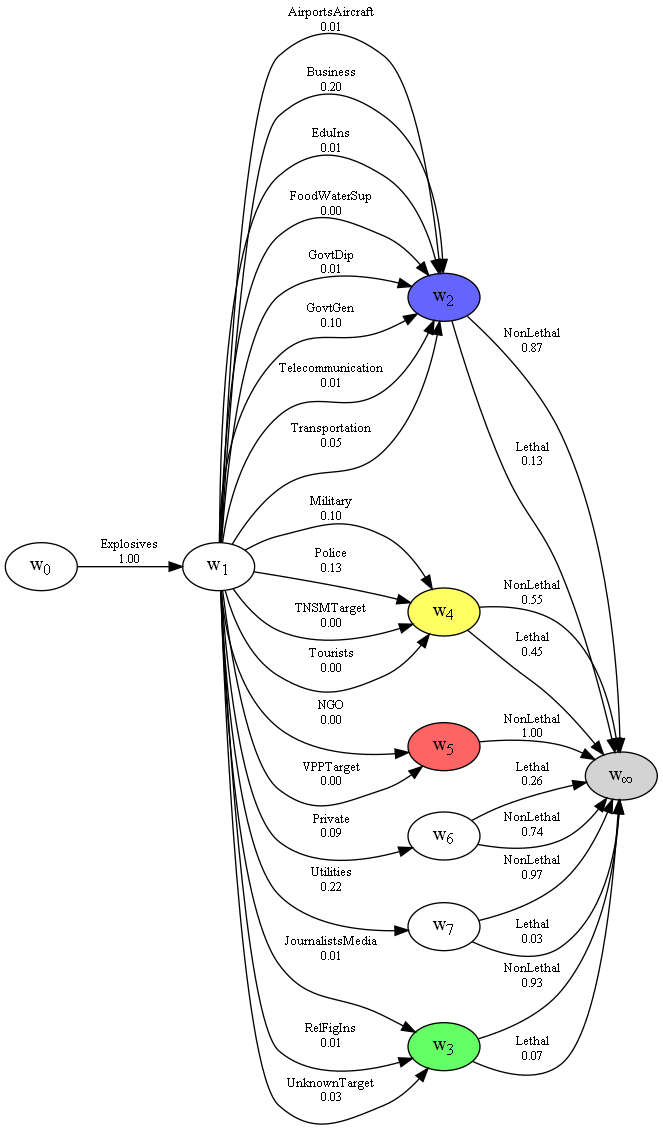

In [20]:
from cegpy import ChainEventGraph
ceg = ChainEventGraph(st)
ceg.create_figure()

The above ceg indicates the probabilities between explosive weapon, target type and lethal attack